In [36]:
import pandas as pd

df = pd.read_csv('AirPassengers.csv')
print(df.shape)
print(df.head())

(144, 2)
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [92]:
raw_month = list(df['Month'])
passengers = list(df['#Passengers'])

train_x = []
for i in range(len(raw_month)):
    year = int( raw_month[i].split('-')[0] ) - 1949
    month = int( raw_month[i].split('-')[1] ) / 12 
    year_month = year + month
    # print(f"entry {i+1} --> {str(year_month)[:4]}    --> {passengers[i]}")
    train_x.append( [year_month] )

print(train_x[:20])

[[0.08333333333333333], [0.16666666666666666], [0.25], [0.3333333333333333], [0.4166666666666667], [0.5], [0.5833333333333334], [0.6666666666666666], [0.75], [0.8333333333333334], [0.9166666666666666], [1.0], [1.0833333333333333], [1.1666666666666667], [1.25], [1.3333333333333333], [1.4166666666666667], [1.5], [1.5833333333333335], [1.6666666666666665]]


In [93]:
import numpy as np

train_y = []
for psg in passengers:
    train_y.append( [psg] )

train_x = np.array(train_x)
train_y = np.array(train_y)

print(train_y[:10])

[[112]
 [118]
 [132]
 [129]
 [121]
 [135]
 [148]
 [148]
 [136]
 [119]]


In [94]:
for i in range(10):
    print(f"{train_x[i]} --> {train_y[i]}")

[0.08333333] --> [112]
[0.16666667] --> [118]
[0.25] --> [132]
[0.33333333] --> [129]
[0.41666667] --> [121]
[0.5] --> [135]
[0.58333333] --> [148]
[0.66666667] --> [148]
[0.75] --> [136]
[0.83333333] --> [119]


In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_shape=[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    loss='mae',
    optimizer='adam',
)

In [422]:
history = model.fit(
    train_x, train_y,
    epochs=50,
    verbose=0
)

model.evaluate(train_x, train_y)

5/5 [==============================] - 0s 2ms/step - loss: 33.1148


33.11482238769531

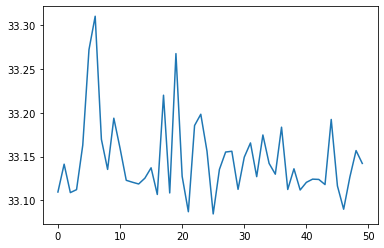

In [423]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()

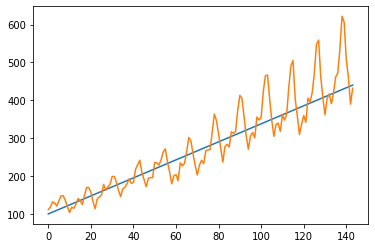

loss: 33.11482418908013


In [424]:
pred = model.predict(train_x)

plt.plot(pred)
plt.plot(train_y)
plt.show()

diff = []
for i in range(len(pred)):
    diff.append( abs(train_y[i][0] - pred[i][0]) )
    # print(f"diff: {str(train_y[i][0] - pred[i][0])[:4]}", end = ' ->  ')
    # print(f"{train_y[i]} --> {pred[i]}")

print( f"loss: {sum(diff)/len(diff)}" )

In [303]:
documents = []
uniq_months = []
for i in range(len(raw_month)):
    # print(f"{ int(raw_month[i].split('-')[1])-1 } --> {passengers[i]}")
    documents.append( [ int(raw_month[i].split('-')[1])-1, passengers[i] ]  )
    uniq_months.append( int(raw_month[i].split('-')[1])-1 )

print(documents, end = '\n\n')
uniq_months = list(set(uniq_months))
print(uniq_months)

[[0, 112], [1, 118], [2, 132], [3, 129], [4, 121], [5, 135], [6, 148], [7, 148], [8, 136], [9, 119], [10, 104], [11, 118], [0, 115], [1, 126], [2, 141], [3, 135], [4, 125], [5, 149], [6, 170], [7, 170], [8, 158], [9, 133], [10, 114], [11, 140], [0, 145], [1, 150], [2, 178], [3, 163], [4, 172], [5, 178], [6, 199], [7, 199], [8, 184], [9, 162], [10, 146], [11, 166], [0, 171], [1, 180], [2, 193], [3, 181], [4, 183], [5, 218], [6, 230], [7, 242], [8, 209], [9, 191], [10, 172], [11, 194], [0, 196], [1, 196], [2, 236], [3, 235], [4, 229], [5, 243], [6, 264], [7, 272], [8, 237], [9, 211], [10, 180], [11, 201], [0, 204], [1, 188], [2, 235], [3, 227], [4, 234], [5, 264], [6, 302], [7, 293], [8, 259], [9, 229], [10, 203], [11, 229], [0, 242], [1, 233], [2, 267], [3, 269], [4, 270], [5, 315], [6, 364], [7, 347], [8, 312], [9, 274], [10, 237], [11, 278], [0, 284], [1, 277], [2, 317], [3, 313], [4, 318], [5, 374], [6, 413], [7, 405], [8, 355], [9, 306], [10, 271], [11, 306], [0, 315], [1, 301], [2,

In [334]:
total_monthly_pass = []

for month in uniq_months:
    temp = 0
    for doc in documents:
        if doc[0] == month:
            temp = temp + doc[1]
    print(f"month: {month} --> total psg: {temp}")
    total_monthly_pass.append(temp)

print(total_monthly_pass)

month: 0 --> total psg: 2901
month: 1 --> total psg: 2820
month: 2 --> total psg: 3242
month: 3 --> total psg: 3205
month: 4 --> total psg: 3262
month: 5 --> total psg: 3740
month: 6 --> total psg: 4216
month: 7 --> total psg: 4213
month: 8 --> total psg: 3629
month: 9 --> total psg: 3199
month: 10 --> total psg: 2794
month: 11 --> total psg: 3142
[2901, 2820, 3242, 3205, 3262, 3740, 4216, 4213, 3629, 3199, 2794, 3142]


In [336]:
year_list = []
for i in raw_month:
    year_list.append( int(i.split('-')[0]) - 1949)
year_list = list(set(year_list))
total_years = len(year_list)
print(total_years)

for month in uniq_months:
    print(f"avg passengers on month {month} --> {total_monthly_pass[month]//total_years}")

12
avg passengers on month 0 --> 241
avg passengers on month 1 --> 235
avg passengers on month 2 --> 270
avg passengers on month 3 --> 267
avg passengers on month 4 --> 271
avg passengers on month 5 --> 311
avg passengers on month 6 --> 351
avg passengers on month 7 --> 351
avg passengers on month 8 --> 302
avg passengers on month 9 --> 266
avg passengers on month 10 --> 232
avg passengers on month 11 --> 261


In [344]:
avg_pass_per_year = 0
for month in uniq_months:
    avg_pass_per_year = avg_pass_per_year + total_monthly_pass[month]//total_years

print('avg_pass_per_year = ', end='')
print(avg_pass_per_year//12)

avg_pass_per_year = 279


In [351]:
for month in uniq_months:
    print(f"avg passengers on month {month} --> { (total_monthly_pass[month]//total_years) - (avg_pass_per_year//12) } more than avg per year")

avg passengers on month 0 --> -38 more than avg per year
avg passengers on month 1 --> -44 more than avg per year
avg passengers on month 2 --> -9 more than avg per year
avg passengers on month 3 --> -12 more than avg per year
avg passengers on month 4 --> -8 more than avg per year
avg passengers on month 5 --> 32 more than avg per year
avg passengers on month 6 --> 72 more than avg per year
avg passengers on month 7 --> 72 more than avg per year
avg passengers on month 8 --> 23 more than avg per year
avg passengers on month 9 --> -13 more than avg per year
avg passengers on month 10 --> -47 more than avg per year
avg passengers on month 11 --> -18 more than avg per year


In [403]:
month_train_x = []
month_train_y = []

for month in uniq_months:
    # print(f"avg passengers on month {month} --> { (total_monthly_pass[month]//total_years) - (avg_pass_per_year//12) } more than avg per year")
    month_train_x.append( [month] )
    month_train_y.append( [(total_monthly_pass[month]//total_years) - (avg_pass_per_year//12) + 47] ) # +47 to get rid of negative values

print(month_train_x)
print(month_train_y)

month_train_x = np.array(month_train_x)
month_train_y = np.array(month_train_y)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]
[[9], [3], [38], [35], [39], [79], [119], [119], [70], [34], [0], [29]]


In [429]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

month_model = Sequential([
    Dense(64, input_shape=[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

month_model.compile(
    loss='mae',
    optimizer='adam',
)

In [430]:
month_history = month_model.fit(
    month_train_x, month_train_y,
    epochs=600,
    verbose=0
)

month_model.evaluate(month_train_x, month_train_y)

5/5 [==============================] - 0s 3ms/step - loss: 230.5047


230.5047149658203

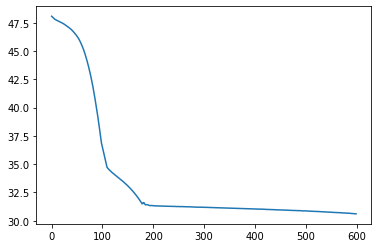

In [431]:
plt.plot(month_history.history['loss'])
plt.show()

[9] -> [97.86617]
[3] -> [126.4022]
[38] -> [154.9382]
[35] -> [183.47421]
[39] -> [212.01025]
[79] -> [240.54626]
[119] -> [269.08228]
[119] -> [297.61832]
[70] -> [326.15433]
[34] -> [354.6903]
[0] -> [383.22635]
[29] -> [411.7624]


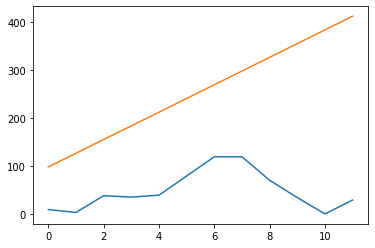

In [434]:
pred = month_model.predict( month_train_x )

for i in range(len(pred)):
    print(f"{month_train_y[i]} -> {pred[i]}")

plt.plot(month_train_y)
plt.plot(pred)
plt.show()